# Data setup

In [11]:
#Uploading Dataset
from google.colab import files
uploaded = files.upload()

# ignore the error

Saving sequence_data.csv to sequence_data (1).csv


KeyboardInterrupt: ignored

In [12]:
pip install -U numpy pandas scikit-learn

In [13]:
import os
import glob
import datetime
from collections import defaultdict
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import warnings

In [14]:
def warn(*args, **kwargs):
    pass

warnings.warn = warn

In [15]:
sequence_track_df = pd.read_csv ('sequence_data.csv')
print(sequence_track_df)

                                    session_id  ...  hist_user_behavior_reason_end
0       0_00006f66-33e5-4de7-a324-2d18e439fc1e  ...                      trackdone
1       0_00006f66-33e5-4de7-a324-2d18e439fc1e  ...                      trackdone
2       0_00006f66-33e5-4de7-a324-2d18e439fc1e  ...                      trackdone
3       0_00006f66-33e5-4de7-a324-2d18e439fc1e  ...                      trackdone
4       0_00006f66-33e5-4de7-a324-2d18e439fc1e  ...                      trackdone
...                                        ...  ...                            ...
167875  0_0eaeef5d-25e9-4429-bd55-af15d3604c9f  ...                      trackdone
167876  0_0eaeef5d-25e9-4429-bd55-af15d3604c9f  ...                      trackdone
167877  0_0eaeef5d-25e9-4429-bd55-af15d3604c9f  ...                      trackdone
167878  0_0eaeef5d-25e9-4429-bd55-af15d3604c9f  ...                      trackdone
167879  0_0eaeef5d-25e9-4429-bd55-af15d3604c9f  ...                      trackdone

[16

In [16]:
track_info_df = pd.read_csv ('track_info.csv')
print(track_info_df)

                                     track_id  ...  acoustic_vector_7
0      t_a540e552-16d4-42f8-a185-232bd650ea7d  ...          -0.675907
1      t_67965da0-132b-4b1e-8a69-0ef99b32287c  ...          -0.525795
2      t_0614ecd3-a7d5-40a1-816e-156d5872a467  ...          -0.433496
3      t_070a63a0-744a-434e-9913-a97b02926a29  ...          -0.542753
4      t_d6990e17-9c31-4b01-8559-47d9ce476df1  ...          -0.455496
...                                       ...  ...                ...
19656  t_46e8cecb-ef52-49e6-83cb-a1d38402b18e  ...          -0.153044
19657  t_23b5d49f-531a-4f74-8957-0d2aacbafca1  ...           0.116128
19658  t_af2b9893-a0e7-4d2e-ac67-0ab40e3243f2  ...           0.121871
19659  t_d7be9fcf-a298-47f0-8f6b-1d93f0742c94  ...          -0.157185
19660  t_c35a58db-7706-4c04-96e8-bce822113659  ...                NaN

[19661 rows x 30 columns]


In [17]:
sequence_track_df = sequence_track_df.rename(columns={"track_id_clean": "track_id"})

In [18]:
df = pd.merge(track_info_df, sequence_track_df, on='track_id')

In [19]:
len(df)

65507

In [66]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.corr())

# Checking co-relation amongst features.

                                     duration  release_year  \
duration                             1.000000     -0.159419   
release_year                        -0.159419      1.000000   
us_popularity_estimate              -0.021789      0.123028   
acousticness                        -0.036945     -0.100735   
beat_strength                       -0.149548      0.178799   
bounciness                          -0.156271      0.227916   
danceability                        -0.183369      0.241255   
dyn_range_mean                      -0.153543      0.241181   
energy                               0.075010     -0.044378   
flatness                            -0.063971      0.291298   
instrumentalness                     0.023209     -0.060303   
key                                  0.059809     -0.204345   
liveness                             0.033523     -0.048253   
loudness                             0.033388      0.173391   
mechanism                           -0.128200      0.22

In [21]:
df.dtypes

track_id                            object
duration                           float64
release_year                         int64
us_popularity_estimate             float64
acousticness                       float64
beat_strength                      float64
bounciness                         float64
danceability                       float64
dyn_range_mean                     float64
energy                             float64
flatness                           float64
instrumentalness                   float64
key                                  int64
liveness                           float64
loudness                           float64
mechanism                          float64
mode                                object
organism                           float64
speechiness                        float64
tempo                              float64
time_signature                       int64
valence                            float64
acoustic_vector_0                  float64
acoustic_ve

In [22]:
df.iloc[1]

track_id                           t_67965da0-132b-4b1e-8a69-0ef99b32287c
duration                                                       187.693329
release_year                                                         1950
us_popularity_estimate                                           99.96943
acousticness                                                     0.916272
beat_strength                                                    0.419223
bounciness                                                        0.54553
danceability                                                     0.491235
dyn_range_mean                                                   9.098376
energy                                                           0.154258
flatness                                                         1.037952
instrumentalness                                                      0.0
key                                                                     0
liveness                              

# Preprocessing

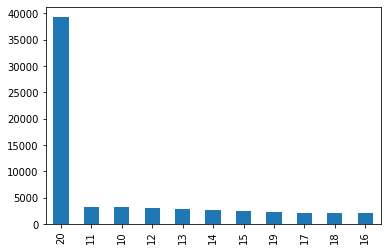

In [23]:
df.session_length.value_counts().plot(kind = 'bar')

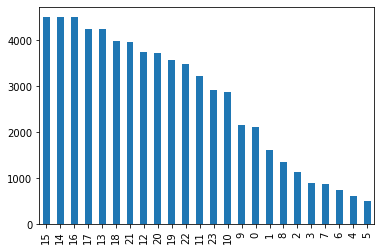

In [24]:
df.hour_of_day.value_counts().plot(kind="bar")

In [25]:
df.session_id.nunique()

9917

In [26]:
hist_user_behavior_reason_start_map = {}
for idx, val in enumerate(df.hist_user_behavior_reason_start.unique()):
    hist_user_behavior_reason_start_map[val] = idx

In [27]:
hist_user_behavior_reason_end_map = {}
for idx, val in enumerate(df.hist_user_behavior_reason_end.unique()):
    hist_user_behavior_reason_end_map[val] = idx

In [28]:
context_type_map = {}
for idx, val in enumerate(df.context_type.unique()):
    context_type_map[val] = idx

In [29]:
mode_map = {}
for idx, val in enumerate(df.loc[:, "mode"].unique()):
    mode_map[val] = idx

In [30]:
session_id_map = {}
for idx, val in enumerate(df.loc[:, "session_id"].unique()):
    session_id_map[val] = idx

In [31]:
track_id_map = {}
for idx, val in enumerate(df.loc[:, "track_id"].unique()):
    track_id_map[val] = idx

In [32]:
skip_time_map = {
    1: "skip_1",
    2: "skip_2",
    3: "skip_3",
    4: "not_skipped",
    5: "otherwise"
}

In [33]:
pause_behaviour_map = {
    1: "no_pause_before_play",
    2: "short_pause_before_play",
    3: "long_pause_before_play",
    4: "otherwise"
}

In [34]:
def convert_data_to_ordinal(df, skip_type):
  df['track_id_int'] = df.apply(lambda row : track_id_map[row.track_id], axis = 1)
  df['session_id_int'] = df.apply(lambda row : session_id_map[row.session_id], axis = 1)
  df['weekday'] = df.apply(lambda row : datetime.datetime.strptime(row.date, "%Y-%m-%d").weekday(), axis = 1)
  df['context_type_int'] = df.apply(lambda row : context_type_map[row.context_type], axis = 1)
  df['hist_user_behavior_reason_end_int'] = df.apply(lambda row : hist_user_behavior_reason_end_map[row.hist_user_behavior_reason_end], axis = 1)
  df['hist_user_behavior_reason_start_int'] = df.apply(lambda row : hist_user_behavior_reason_start_map[row.hist_user_behavior_reason_start], axis = 1)
  df['mode_int'] = df.apply(lambda row : mode_map[row['mode']], axis = 1)
  df['hist_user_behavior_is_shuffle_int'] = df.apply(lambda row : 1 if row.hist_user_behavior_is_shuffle else 0, axis = 1)
  df['premium_int'] = df.apply(lambda row : 1 if row.premium else 0, axis = 1)
  df['pause_behaviour'] = df.apply(lambda row : 1 if row.no_pause_before_play else 2 if row.short_pause_before_play else 3 if row.long_pause_before_play else 4, axis = 1)
  df['skip_time'] = df.apply(lambda row : 1 if row.skip_1 else 2 if row.skip_2 else 3 if row.skip_3 else 4 if row.not_skipped else 5, axis = 1)
  if skip_type == 1:
    df['skipped'] = df.apply(lambda row : 1 if row.skip_1 else 0, axis = 1)
  elif skip_type == 2:
    df['skipped'] = df.apply(lambda row : 1 if row.skip_2 else 0, axis = 1)
  elif skip_type == 3:
    df['skipped'] = df.apply(lambda row : 1 if row.skip_3 else 0, axis = 1)
  else:
    df['skipped'] = df.apply(lambda row : 1 if row.not_skipped else 0, axis = 1)
  df['session_poss_amal'] =  df.apply(lambda row : str(int(row.session_id_int)) + '_' + str(int(row.session_position)), axis = 1)
  return df

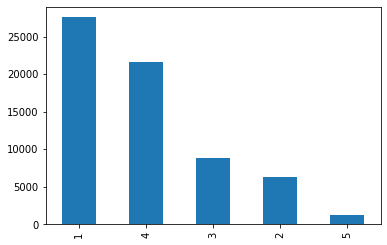

In [60]:
def plot_skip_behaviour_distribution(df):
  df = convert_data_to_ordinal(df, 1)
  df.skip_time.value_counts().plot(kind='bar')

plot_skip_time(df)

# Plot of distribution of data based on skip behaviour

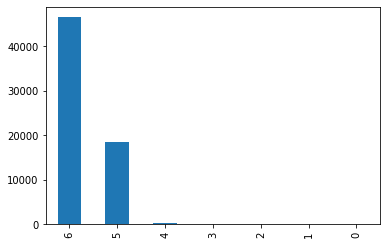

In [61]:
def plot_weekday_distribution(df):
  df = convert_data_to_ordinal(df, 1)
  df.weekday.value_counts().plot(kind='bar')

plot_weekday(df)

# Plot of distribution of data based on weekday

In [37]:
def df_drop_redundant(df):
  return df.drop(columns=['skip_1', 'skip_2', 'skip_3', 'not_skipped', 'date', 'long_pause_before_play', 'short_pause_before_play', 'no_pause_before_play', 'track_id', 'session_id', 'context_type', 'hist_user_behavior_reason_end', 'hist_user_behavior_reason_start', 'mode', 'hist_user_behavior_is_shuffle', 'premium','skip_time'])

In [38]:
def df_setup(n, df):
  df_map = {}
  for i in range(1, n + 1):
    df_map[i] = df.copy(deep=True)
    df_map[i].columns = ['last_' + str(i) + '_' + str(col) for col in df_map[i].columns] 
  for i in range(1, n + 1):
    # print('last_' + str(i) + '_session_poss_amal')
    df['last_' + str(i) + '_session_poss_amal'] =  df.apply(lambda row : str(int(row.session_id_int)) + '_' + str(int(row.session_position - i)) if (row.session_position >= i + 1) else None, axis = 1)
    df = pd.merge(df, df_map[i], on="last_" + str(i) + "_session_poss_amal")
    df_map.pop(i)
    df.drop(columns=['last_' + str(i) + '_session_poss_amal', 'last_' + str(i) + '_session_id_int', 'last_' + str(i) + '_session_position', 'last_' + str(i) + '_session_length']) 
    df.drop(columns=['session_poss_amal'])
  return df

In [39]:
def upscaling(x_train, y_train):
  x = pd.concat([x_train, y_train], axis=1)
  # separate minority and majority classes
  not_skipped = x[x.skipped==0]
  skipped = x[x.skipped==1]
  skipped_upsampled = resample(skipped,
                            replace=True, # sample with replacement
                            n_samples=len(not_skipped), # match number in majority class
                            random_state=27) # reproducible results

  # combine majority and upsampled minority
  upsampled = pd.concat([not_skipped, skipped_upsampled])
  x_train = upsampled[upsampled.columns.difference(['skip_time', 'skipped'])]
  y_train = upsampled.loc[:, upsampled.columns == 'skipped']
  # print(upsampled.skipped.value_counts())
  return (x_train, y_train)

In [40]:
def scale_data(x_train, x_test):
  scaler = StandardScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)
  # print(x_train)
  # print(x_test)
  return (x_train, x_test)

# Analysis

In [41]:
def report_confusion_metrics(y_test, y_pred, algo_name):
  lda_tn, lda_fp, lda_fn, lda_tp = confusion_matrix(y_test, y_pred).ravel()
  lda_tpr = lda_tp/(lda_tp + lda_fn)
  lda_tnr = lda_tn/(lda_tn + lda_fp)
  lda_accuracy = (lda_tp + lda_tn) / (lda_tp + lda_fn + lda_tn + lda_fp)
  lda_f1_accuracy = f1_score(y_test, y_pred)
  logistic_regression_confusion_matrix_info = pd.DataFrame({"TP": float(lda_tp),
                                  "FP": lda_fp,
                                  "TN": lda_tn,
                                  "FN": lda_fn,
                                  "TPR": lda_tpr,
                                  "TNR": lda_tnr,
                                  "Accuracy": float(lda_accuracy), 
                                  "F1 Accuracy": float(lda_f1_accuracy)},index=[algo_name])
  print(logistic_regression_confusion_matrix_info.to_markdown())

In [42]:
def generate_logistics_regression_results(x_train, y_train, x_test, y_test):
  logistic_regression = LogisticRegression(max_iter=1000)
  logistic_regression.fit(x_train, y_train.values.ravel())
  logistic_regression_y_pred = logistic_regression.predict(x_test)
  report_confusion_metrics(y_test, logistic_regression_y_pred, "Logistics Regression")

In [43]:
def generate_random_forest_results(x_train, y_train, x_test, y_test):
  random_forest_classifier = RandomForestClassifier(random_state=0)
  random_forest_classifier.fit(x_train, y_train.values.ravel())
  random_forest_classifier_pred = random_forest_classifier.predict(x_test)
  report_confusion_metrics(y_test, random_forest_classifier_pred, "Random Forest Classifier")

In [44]:
def generate_lda_results(x_train, y_train, x_test, y_test):
  lda = LDA(solver="svd")
  lda.fit(x_train, y_train.values.ravel())
  lda_pred = lda.predict(x_test)
  report_confusion_metrics(y_test, lda_pred, "LDA Classifier")

In [45]:
def generate_qda_results(x_train, y_train, x_test, y_test):
  qda = QDA()
  qda.fit(x_train, y_train.values.ravel())
  qda_pred = qda.predict(x_test)
  report_confusion_metrics(y_test, qda_pred, "QDA Classifier")

In [46]:
def generate_linear_regression_results(x_train, y_train, x_test, y_test):
  linear_regression = LinearRegression()
  linear_regression.fit(x_train, y_train.values.ravel())
  linear_regression_y_pred = linear_regression.predict(x_test)
  binary_linear_regression_y_pred = []
  for i in linear_regression_y_pred:
      if i <= 0.5:
          binary_linear_regression_y_pred.append(0)
      else:
          binary_linear_regression_y_pred.append(1)
  report_confusion_metrics(y_test, binary_linear_regression_y_pred, "Linear Regression")

In [47]:
def generate_knn_classifier_results(n, p, x_train, y_train, x_test, y_test):
  knn = KNeighborsClassifier(n_neighbors=n, p=p, metric='minkowski', n_jobs=-1)
  knn.fit(x_train, y_train.values.ravel())
  y_pred = knn.predict(x_test)
  report_confusion_metrics(y_test, y_pred, "KNN Classifier: No. of neighbours= " + str(n) + " and Power parameter= " + str(p))

In [48]:
def generate_gaussian_naive_bayes_results(x_train, y_train, x_test, y_test):
  gnb = GaussianNB()
  gnb_pred = gnb.fit(x_train, y_train).predict(x_test)
  report_confusion_metrics(y_test, gnb_pred, "Gaussian Naive Bayes Classifier")

In [52]:
def generate_gradient_boosting_classifier(x_train, y_train, x_test, y_test):
  gb_classifier = GradientBoostingClassifier(max_depth=1, random_state=0)
  gb_classifier.fit(x_train, y_train.values.ravel())
  gb_classifier_pred = gb_classifier.predict(x_test)
  report_confusion_metrics(y_test, gb_classifier_pred, "Gradient Boosting Classifier")

In [53]:
def generate_adaptive_boosting_classifier(x_train, y_train, x_test, y_test):
  ab_classifier = AdaBoostClassifier(random_state=0)
  ab_classifier.fit(x_train, y_train.values.ravel())
  ab_classifier_pred = ab_classifier.predict(x_test)
  report_confusion_metrics(y_test, ab_classifier_pred, "Adaptive Boosting Classifier")

In [54]:
def create_train_test_data(train_df, test_df):
  x_train = train_df[train_df.columns.difference(['skip_time', 'skipped'])]
  x_test = test_df[test_df.columns.difference(['skipped', 'skip_time'])]
  y_train = train_df.loc[:, train_df.columns == 'skipped']
  y_test = test_df.loc[:, test_df.columns == 'skipped']
  return x_train, y_train, x_test, y_test

In [56]:
def predict_results(df, skip_type, n):
  df = convert_data_to_ordinal(df, skip_type)
  df = df_drop_redundant(df)
  df = df_setup(n, df)
  train_df, test_df = train_test_split(df, test_size=0.5, random_state=42, shuffle=True)
  x_train, y_train, x_test, y_test = create_train_test_data(train_df, test_df)
  x_train, y_train = upscaling(x_train, y_train)
  x_train, x_test = scale_data(x_train, x_test)
  print()
  generate_logistics_regression_results(x_train, y_train, x_test, y_test)
  print()
  generate_random_forest_results(x_train, y_train, x_test, y_test)
  print()
  generate_lda_results(x_train, y_train, x_test, y_test)
  print()
  generate_qda_results(x_train, y_train, x_test, y_test)
  print()
  generate_linear_regression_results(x_train, y_train, x_test, y_test)
  print()
  generate_knn_classifier_results(3, 1, x_train, y_train, x_test, y_test)
  print()
  generate_knn_classifier_results(3, 2, x_train, y_train, x_test, y_test)
  print()
  generate_knn_classifier_results(5, 2, x_train, y_train, x_test, y_test)
  print()
  generate_gaussian_naive_bayes_results(x_train, y_train, x_test, y_test)
  print()
  generate_gradient_boosting_classifier(x_train, y_train, x_test, y_test)
  print()
  generate_adaptive_boosting_classifier(x_train, y_train, x_test, y_test)

# Results

Due to session disconnect on Google Colab Platforms, prediction is made in parts.

For skip type = 1 and n = 1

|                      |    TP |   FP |    TN |   FN |      TPR |     TNR |   Accuracy |   F1 Accuracy |
|:---------------------|------:|-----:|------:|-----:|---------:|--------:|-----------:|--------------:|
| Logistics Regression | 30062 | 8949 | 35933 | 3996 | 0.882671 | 0.80061 |   0.836015 |      0.822839 |

|                          |    TP |   FP |    TN |   FN |      TPR |      TNR |   Accuracy |   F1 Accuracy |
|:-------------------------|------:|-----:|------:|-----:|---------:|---------:|-----------:|--------------:|
| Random Forest Classifier | 30115 | 5767 | 39115 | 3943 | 0.884227 | 0.871508 |   0.876995 |      0.861167 |

|                |    TP |    FP |    TN |   FN |      TPR |      TNR |   Accuracy |   F1 Accuracy |
|:---------------|------:|------:|------:|-----:|---------:|---------:|-----------:|--------------:|
| LDA Classifier | 29493 | 10432 | 34450 | 4565 | 0.865964 | 0.767568 |    0.81002 |      0.797291 |

|                |  

KeyboardInterrupt: ignored

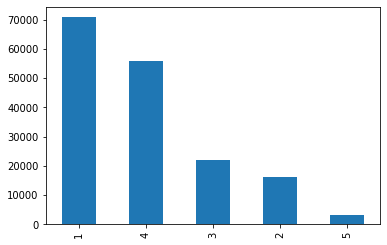

In [ ]:
for skip_type in [1, 2, 3, 4]:
  for n in [1, 3, 5, 10, 15, 19]:
    print("For skip type =", skip_type, "and n =", n)
    predict_results(df.copy(), skip_type, n)

For skip type = 1 and n = 5

|                      |    TP |   FP |    TN |   FN |      TPR |      TNR |   Accuracy |   F1 Accuracy |
|:---------------------|------:|-----:|------:|-----:|---------:|---------:|-----------:|--------------:|
| Logistics Regression | 22610 | 6214 | 26788 | 3328 | 0.871694 | 0.811708 |   0.838107 |      0.825755 |

|                          |    TP |   FP |    TN |   FN |      TPR |      TNR |   Accuracy |   F1 Accuracy |
|:-------------------------|------:|-----:|------:|-----:|---------:|---------:|-----------:|--------------:|
| Random Forest Classifier | 22279 | 4134 | 28868 | 3659 | 0.858933 | 0.874735 |   0.867781 |      0.851139 |

|                |    TP |   FP |    TN |   FN |      TPR |      TNR |   Accuracy |   F1 Accuracy |
|:---------------|------:|-----:|------:|-----:|---------:|---------:|-----------:|--------------:|
| LDA Classifier | 22529 | 7220 | 25782 | 3409 | 0.868571 | 0.781225 |   0.819664 |       0.80913 |

|                |  

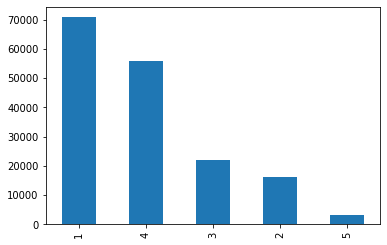

In [ ]:
for skip_type in [1]:
  for n in [5, 10, 15, 19]:
    print("For skip type =", skip_type, "and n =", n)
    predict_results(df.copy(), skip_type, n)

In [ ]:
for skip_type in [2, 3, 4]:
  for n in [1, 3, 5, 10, 15, 19]:
    print("For skip type =", skip_type, "and n =", n)
    predict_results(df.copy(), skip_type, n)

For skip type = 2 and n = 1

|                      |    TP |   FP |    TN |   FN |      TPR |      TNR |   Accuracy |   F1 Accuracy |
|:---------------------|------:|-----:|------:|-----:|---------:|---------:|-----------:|--------------:|
| Logistics Regression | 36526 | 6142 | 31236 | 5036 | 0.878832 | 0.835679 |   0.858399 |      0.867292 |

|                          |    TP |   FP |    TN |   FN |      TPR |      TNR |   Accuracy |   F1 Accuracy |
|:-------------------------|------:|-----:|------:|-----:|---------:|---------:|-----------:|--------------:|
| Random Forest Classifier | 36130 | 4674 | 32704 | 5432 | 0.869304 | 0.874953 |   0.871979 |      0.877304 |

|                |    TP |   FP |    TN |   FN |     TPR |      TNR |   Accuracy |   F1 Accuracy |
|:---------------|------:|-----:|------:|-----:|--------:|---------:|-----------:|--------------:|
| LDA Classifier | 35905 | 7069 | 30309 | 5657 | 0.86389 | 0.810878 |   0.838789 |      0.849461 |

|                |    T

For skip type = 3 and n = 3

|                      |    TP |   FP |    TN |   FN |      TPR |     TNR |   Accuracy |   F1 Accuracy |
|:---------------------|------:|-----:|------:|-----:|---------:|--------:|-----------:|--------------:|
| Logistics Regression | 44587 |  844 | 23140 |  369 | 0.991792 | 0.96481 |   0.982405 |       0.98658 |

|                          |    TP |   FP |    TN |   FN |      TPR |      TNR |   Accuracy |   F1 Accuracy |
|:-------------------------|------:|-----:|------:|-----:|---------:|---------:|-----------:|--------------:|
| Random Forest Classifier | 44673 |  895 | 23089 |  283 | 0.993705 | 0.962683 |   0.982913 |      0.986987 |

|                |    TP |   FP |    TN |   FN |      TPR |      TNR |   Accuracy |   F1 Accuracy |
|:---------------|------:|-----:|------:|-----:|---------:|---------:|-----------:|--------------:|
| LDA Classifier | 42353 |  800 | 23184 | 2603 | 0.942099 | 0.966644 |   0.950638 |      0.961377 |

|                |    T

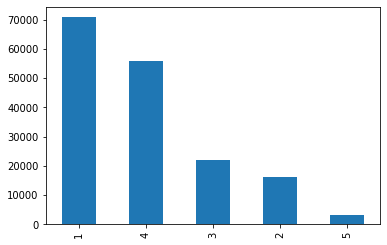

In [ ]:
for skip_type in [3]:
  for n in [3, 5, 10, 15, 19]:
    print("For skip type =", skip_type, "and n =", n)
    predict_results(df.copy(), skip_type, n)

For skip type = 4 and n = 1

|                      |    TP |   FP |    TN |   FN |     TPR |      TNR |   Accuracy |   F1 Accuracy |
|:---------------------|------:|-----:|------:|-----:|--------:|---------:|-----------:|--------------:|
| Logistics Regression | 26028 |  762 | 51995 |  155 | 0.99408 | 0.985556 |   0.988384 |      0.982689 |

|                          |    TP |   FP |    TN |   FN |      TPR |      TNR |   Accuracy |   F1 Accuracy |
|:-------------------------|------:|-----:|------:|-----:|---------:|---------:|-----------:|--------------:|
| Random Forest Classifier | 25964 |  549 | 52208 |  219 | 0.991636 | 0.989594 |   0.990271 |      0.985426 |

|                |    TP |   FP |    TN |   FN |      TPR |     TNR |   Accuracy |   F1 Accuracy |
|:---------------|------:|-----:|------:|-----:|---------:|--------:|-----------:|--------------:|
| LDA Classifier | 25971 | 2918 | 49839 |  212 | 0.991903 | 0.94469 |    0.96035 |      0.943165 |

|                |    TP |

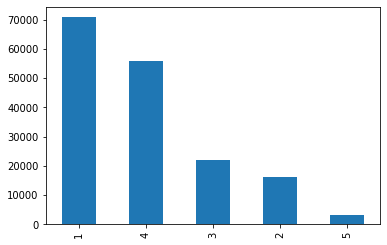

In [ ]:
for skip_type in [4]:
  for n in [1, 3, 5, 10, 15, 19]:
    print("For skip type =", skip_type, "and n =", n)
    predict_results(df.copy(), skip_type, n)